WCczytajmy dane

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

#Zdefiniujemy domyślne rozmiary czcionek służące do generowania ładnych rysunków
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

datapath = Path() / "data" / "housing" # Definiujemy ścieżkę do bieżącego katalogu
housing = pd.read_csv(datapath / "housing.csv")

In [2]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing.describe(include=object)

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


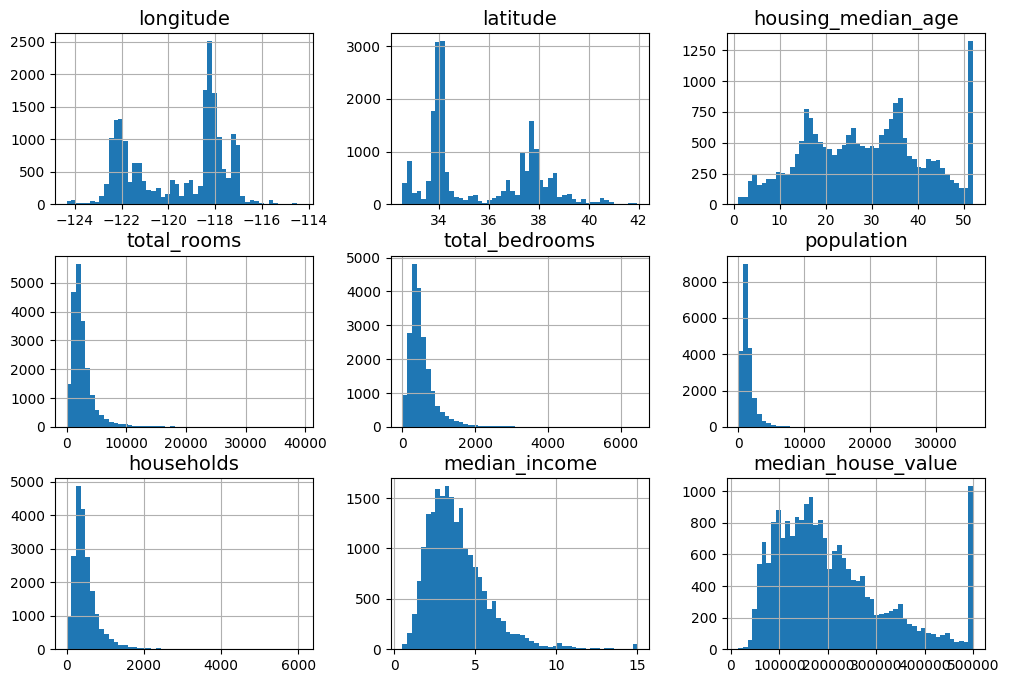

In [7]:
housing.hist(bins=50, figsize=(12,8))
plt.show()

In [8]:
#Utwórzmy zbiór testowy
from sklearn.model_selection import train_test_split

In [9]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [10]:

housing["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

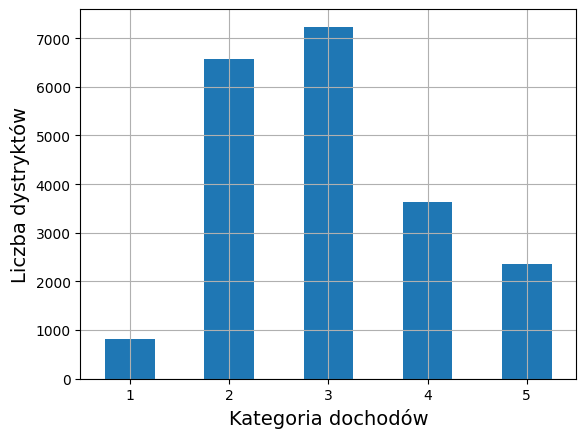

In [11]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Kategoria dochodów")
plt.ylabel("Liczba dystryktów")
plt.show()

In [12]:
df_train_rand_samp, df_test_rand_samp = train_test_split(
    housing, test_size=0.2, random_state=42)
df_train, df_test = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [13]:

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

compare_samp = pd.DataFrame({
    "Łącznie (%)": income_cat_proportions(housing),
    "Warstwowe (%)": income_cat_proportions(df_test),
    "Losowe (%)": income_cat_proportions(df_test_rand_samp),
}).sort_index()
compare_samp.index.name = "Kategoria dochodów"
compare_samp["Błąd - warstwowe (%)"] = (compare_samp["Warstwowe (%)"] /
                                     compare_samp["Łącznie (%)"]- 1 )
compare_samp["Błąd - losowe (%)"] = (compare_samp["Losowe (%)"] /
                                     compare_samp["Łącznie (%)"] - 1)
(compare_samp * 100).round(2)

,Łącznie (%),Warstwowe (%),Losowe (%),Błąd - warstwowe (%),Błąd - losowe (%)
Kategoria dochodów,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


In [14]:
for set_ in (df_train, df_test):
    set_.drop("income_cat", axis=1, inplace=True)

In [16]:
df_train_eda = df_train.copy()

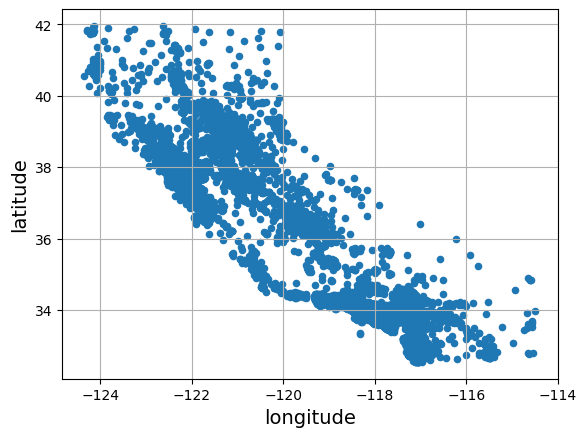

In [17]:
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid = True)
plt.show()

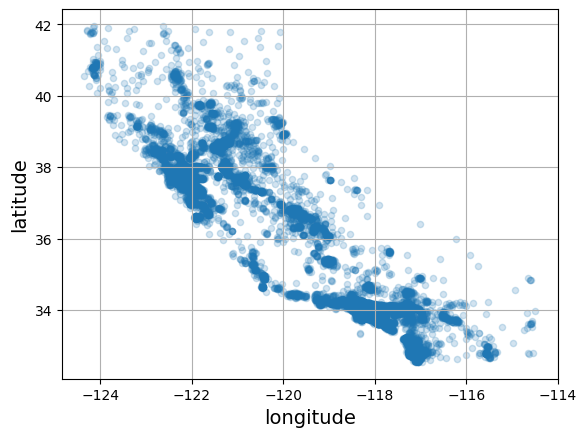

In [18]:
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid = True, alpha=0.2)
plt.show()

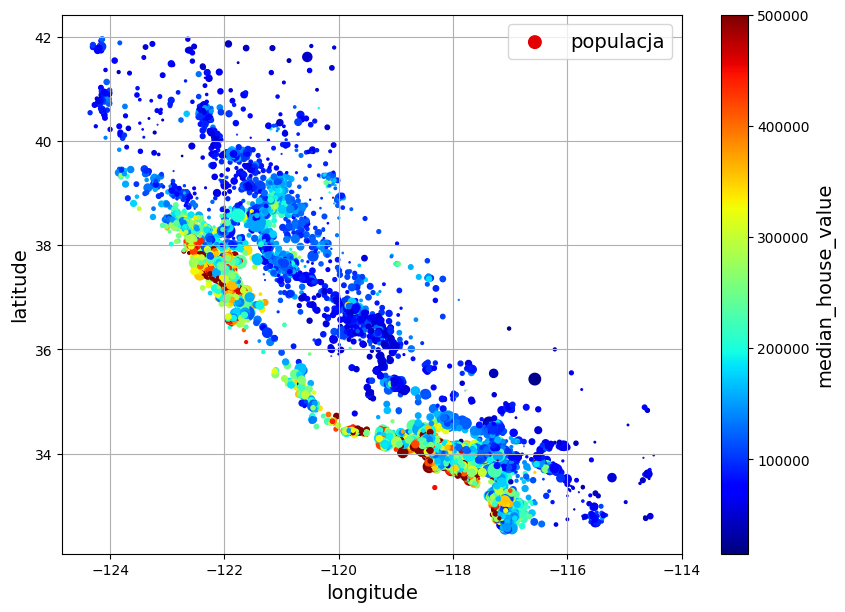

In [20]:
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid = True,
                  s=df_train_eda["population"] / 100, label= "populacja",
                  c="median_house_value", cmap="jet", colorbar = True,
                  legend = True, sharex = False, figsize=(10, 7))
plt.show()

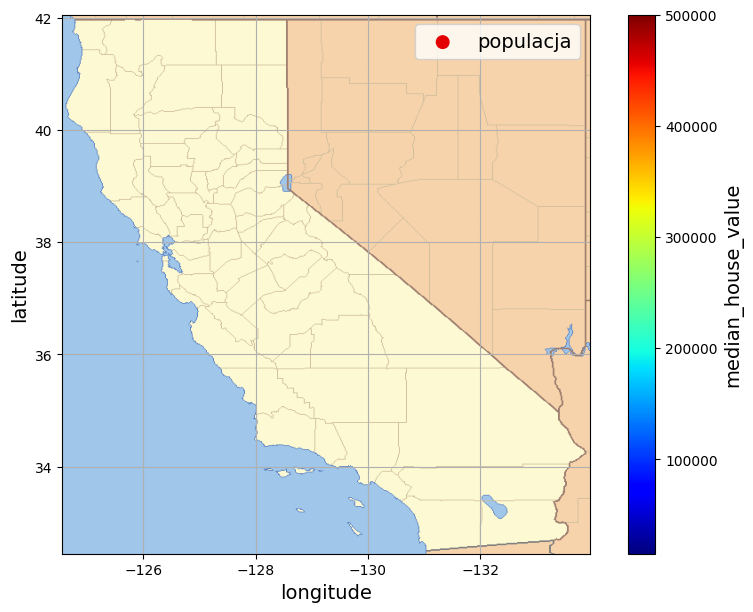

In [21]:
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid = True,
                  s=df_train_eda["population"] / 100, label= "populacja",
                  c="median_house_value", cmap="jet", colorbar = True,
                  legend = True, sharex = False, figsize=(10, 7))
california_img = plt.imread(datapath / "california.png")
axis = -124.55, -133.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)
plt.show()
